## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.

In [8]:
import pandas as pd
import numpy as np

In [9]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data 

--2023-09-22 07:23:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

housing.csv         100%[===================>]   1.36M  8.07MB/s    in 0.2s    

2023-09-22 07:23:23 (8.07 MB/s) - 'housing.csv' saved [1423529/1423529]



In [10]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/367074269.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",


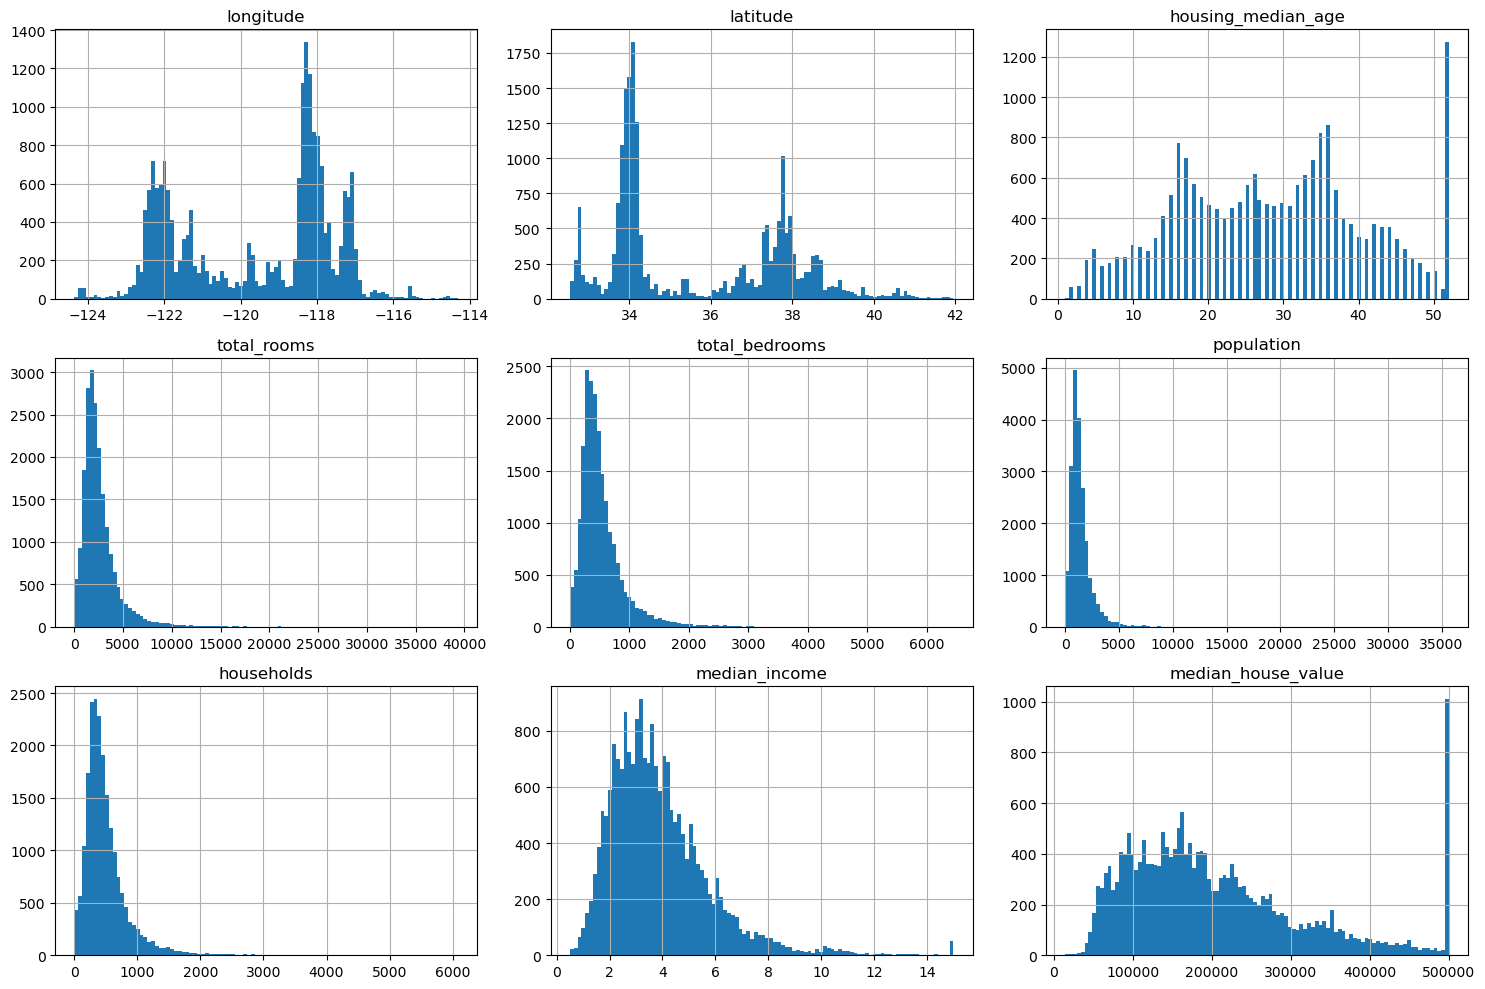

In [35]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

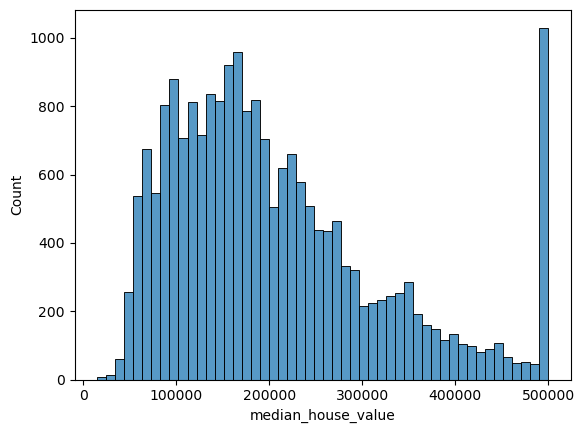

In [14]:
sns.histplot(df.median_house_value, bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

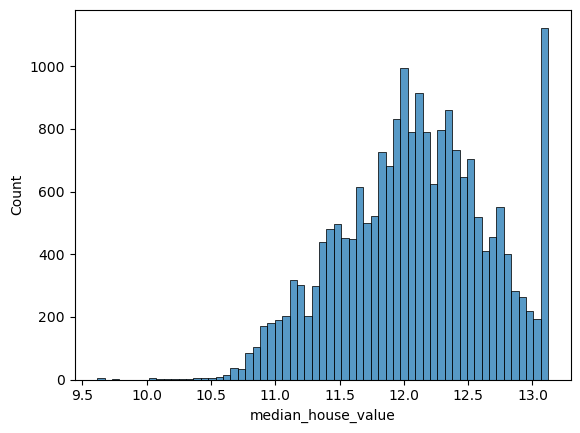

In [37]:
sns.histplot(np.log1p(df.median_house_value))

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [63]:
df_inland = df[df.ocean_proximity == 'INLAND']
df_inland

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [64]:
columns_to_keep = ['latitude','longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_house_value']
df_inland = df_inland[columns_to_keep]
df_inland

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
954,37.64,-121.92,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0
957,37.66,-121.90,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0
965,37.68,-121.88,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0
967,37.67,-121.88,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0
968,37.67,-121.88,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [65]:
missing_values = df_inland.isna().sum()

feature_with_missing_values = missing_values[missing_values > 0].index[0]
feature_with_missing_values

'total_bedrooms'

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [66]:
population_median = df_inland['population'].median()
population_median

1124.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [67]:
# Shuffle the dataset with seed 42
shuffled_df = df_inland.sample(frac=1, random_state=42)

# Split the data into train, validation, and test sets (60%/20%/20%)
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

total_samples = len(shuffled_df)
train_size = int(total_samples * train_ratio)
val_size = int(total_samples * val_ratio)

train_data = shuffled_df[:train_size]
val_data = shuffled_df[train_size:train_size + val_size]
test_data = shuffled_df[train_size + val_size:]

# Apply the log transformation to the median_house_value variable using np.log1p()
train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
test_data['median_house_value'] = np.log1p(test_data['median_house_value'])

/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/2436706269.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/2436706269.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/2436706269.py:20: SettingWithCopyWarning

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt


# Separate the target variable ('median_house_value') from the features
X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']
X_val = val_data.drop(['median_house_value'], axis=1)
y_val = val_data['median_house_value']

# Option 1: Fill missing 'total_bedrooms' values with 0
X_train_fill_zero = X_train.fillna(0)
X_val_fill_zero = X_val.fillna(0)

# Option 2: Fill missing 'total_bedrooms' values with the mean of the training set
mean_total_bedrooms = X_train['total_bedrooms'].mean()
X_train_fill_mean = X_train.fillna({'total_bedrooms': mean_total_bedrooms})
X_val_fill_mean = X_val.fillna({'total_bedrooms': mean_total_bedrooms})


# Function to train and evaluate a linear regression model and calculate RMSE
def evaluate_linear_regression(X_train, y_train, X_val, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    return rmse

# Evaluate Option 1: Fill with 0
rmse_option_1 = evaluate_linear_regression(X_train_fill_zero, y_train, X_val_fill_zero, y_val)

# Evaluate Option 2: Fill with mean
rmse_option_2 = evaluate_linear_regression(X_train_fill_mean, y_train, X_val_fill_mean, y_val)

# Compare RMSE scores and round them to 2 decimal digits
rmse_option_1_rounded = round(rmse_option_1, 2)
rmse_option_2_rounded = round(rmse_option_2, 2)

print(f"RMSE (Fill with 0): {rmse_option_1_rounded}")
print(f"RMSE (Fill with Mean): {rmse_option_2_rounded}")

RMSE (Fill with 0): 0.33
RMSE (Fill with Mean): 0.33


Both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [71]:
from sklearn.linear_model import Ridge

# List of regularization parameters (r)
reg_params = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Dictionary to store RMSE scores for different r values
rmse_scores = {}

# Function to train and evaluate a Ridge regression model with a given alpha (r)
def evaluate_ridge_regression(alpha, X_train, y_train, X_val, y_val):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    return rmse

# Evaluate for different values of alpha (r)
for alpha in reg_params:
    rmse = evaluate_ridge_regression(alpha, X_train_fill_zero, y_train, X_val_fill_zero, y_val)
    rmse_scores[alpha] = rmse

# Find the best alpha (r) with the smallest RMSE
best_alpha = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_alpha]

# Round the RMSE score to 2 decimal digits
best_rmse_rounded = round(best_rmse, 2)

print(f"RMSE scores for different r values:")
for alpha, rmse in rmse_scores.items():
    print(f"r = {alpha}: RMSE = {round(rmse, 2)}")

print(f"Best r: {best_alpha} (RMSE = {best_rmse_rounded})")

RMSE scores for different r values:
r = 0: RMSE = 0.33
r = 1e-06: RMSE = 0.33
r = 0.0001: RMSE = 0.33
r = 0.001: RMSE = 0.33
r = 0.01: RMSE = 0.33
r = 0.1: RMSE = 0.33
r = 1: RMSE = 0.33
r = 5: RMSE = 0.33
r = 10: RMSE = 0.33
Best r: 0 (RMSE = 0.33)


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [72]:
# List of seed values to try
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List to store RMSE scores for each seed
rmse_scores = []

for seed in seed_values:
    shuffled_df = df_inland.sample(frac=1, random_state=seed)

    # Split the data into train, validation, and test sets (60%/20%/20%)
    train_ratio = 0.6
    val_ratio = 0.2
    test_ratio = 0.2

    total_samples = len(shuffled_df)
    train_size = int(total_samples * train_ratio)
    val_size = int(total_samples * val_ratio)

    train_data = shuffled_df[:train_size]
    val_data = shuffled_df[train_size:train_size + val_size]
    test_data = shuffled_df[train_size + val_size:]
    
    # Apply the log transformation to the median_house_value variable using np.log1p()
    train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
    val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
    test_data['median_house_value'] = np.log1p(test_data['median_house_value'])

    # Separate the target variable ('median_house_value') from the features
    X_train = train_data.drop(['median_house_value'], axis=1)
    y_train = train_data['median_house_value']
    X_val = val_data.drop(['median_house_value'], axis=1)
    y_val = val_data['median_house_value']

    # Fill missing values with 0
    X_train_fill_zero = X_train.fillna(0)
    X_val_fill_zero = X_val.fillna(0)

    # Train a linear regression model without regularization
    model = LinearRegression()
    model.fit(X_train_fill_zero, y_train)

    # Predict on the validation dataset
    y_pred = model.predict(X_val_fill_zero)

    # Calculate RMSE and append to the list
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)
    
    

# Calculate the standard deviation of RMSE scores
std_deviation = np.std(rmse_scores)

# Round the standard deviation to 3 decimal digits
std_deviation_rounded = np.round(np.std(rmse_scores),3)


print(f"RMSE scores for different seed values: {rmse_scores}")
print(f"Standard Deviation of RMSE Scores: {std_deviation_rounded}")


RMSE scores for different seed values: [0.3273709900520588, 0.33600882746728, 0.33965913506077694, 0.3143656840024408, 0.33652630648229837, 0.3251647989046544, 0.3273539162897742, 0.32381461795755856, 0.32362517202428026, 0.32902646356773724]
Standard Deviation of RMSE Scores: 0.007


/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/2141385432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/2141385432.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/2141385432.py:26: SettingWithCopyWarning

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [73]:
# Seed for splitting the data
seed = 9

# Shuffle the dataset with the specified seed
shuffled_df = df_inland.sample(frac=1, random_state=seed)

# Split the data into train, validation, and test sets (60%/20%/20%)
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

total_samples = len(shuffled_df)
train_size = int(total_samples * train_ratio)
val_size = int(total_samples * val_ratio)

train_data = shuffled_df[:train_size]
val_data = shuffled_df[train_size:train_size + val_size]
test_data = shuffled_df[train_size + val_size:]

# Apply the log transformation to the median_house_value variable using np.log1p()
train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
test_data['median_house_value'] = np.log1p(test_data['median_house_value'])

# Combine train and validation datasets
combined_train_data = pd.concat([train_data, val_data])

# Separate the target variable ('median_house_value') from the features for train and test
X_train_val = combined_train_data.drop(['median_house_value'], axis=1)
y_train_val = combined_train_data['median_house_value']
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

# Fill missing values with 0
X_train_val_fill_zero = X_train_val.fillna(0)
X_test_fill_zero = X_test.fillna(0)

# Train a Ridge regression model with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_val_fill_zero, y_train_val)

# Predict on the test dataset
y_pred_test = model.predict(X_test_fill_zero)

# Calculate RMSE on the test dataset
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE on the test dataset: {rmse_test:.3f}")

RMSE on the test dataset: 0.337


/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/3172748216.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/3172748216.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
/var/folders/3v/hd8_8sd16sgfr4csswyn8kpc0000gn/T/ipykernel_1885/3172748216.py:23: SettingWithCopyWarning